In [1]:
import numpy as np
import matplotlib.pyplot as plt
from RepliSage.network_analysis import *
from collections import Counter
from itertools import product

In [2]:
Ms = np.load('/home/skorsak/Downloads/replisage/new_results/replisage_chromosome_14_ht_fast_lefs/metadata/Ms.npy')
Ns = np.load('/home/skorsak/Downloads/replisage/new_results/replisage_chromosome_14_ht_fast_lefs/metadata/Ns.npy')

In [3]:
Ms.shape

(1100, 1000)

In [4]:
Ls = Ns-Ms

In [5]:
avg_Ls = np.average(Ls,axis=0)
std_Ls = np.std(Ls,axis=0)
sem_Ls = std_Ls / np.sqrt(Ls.shape[0])  # SEM = std / sqrt(N)
ci95 = 1.96 * sem_Ls

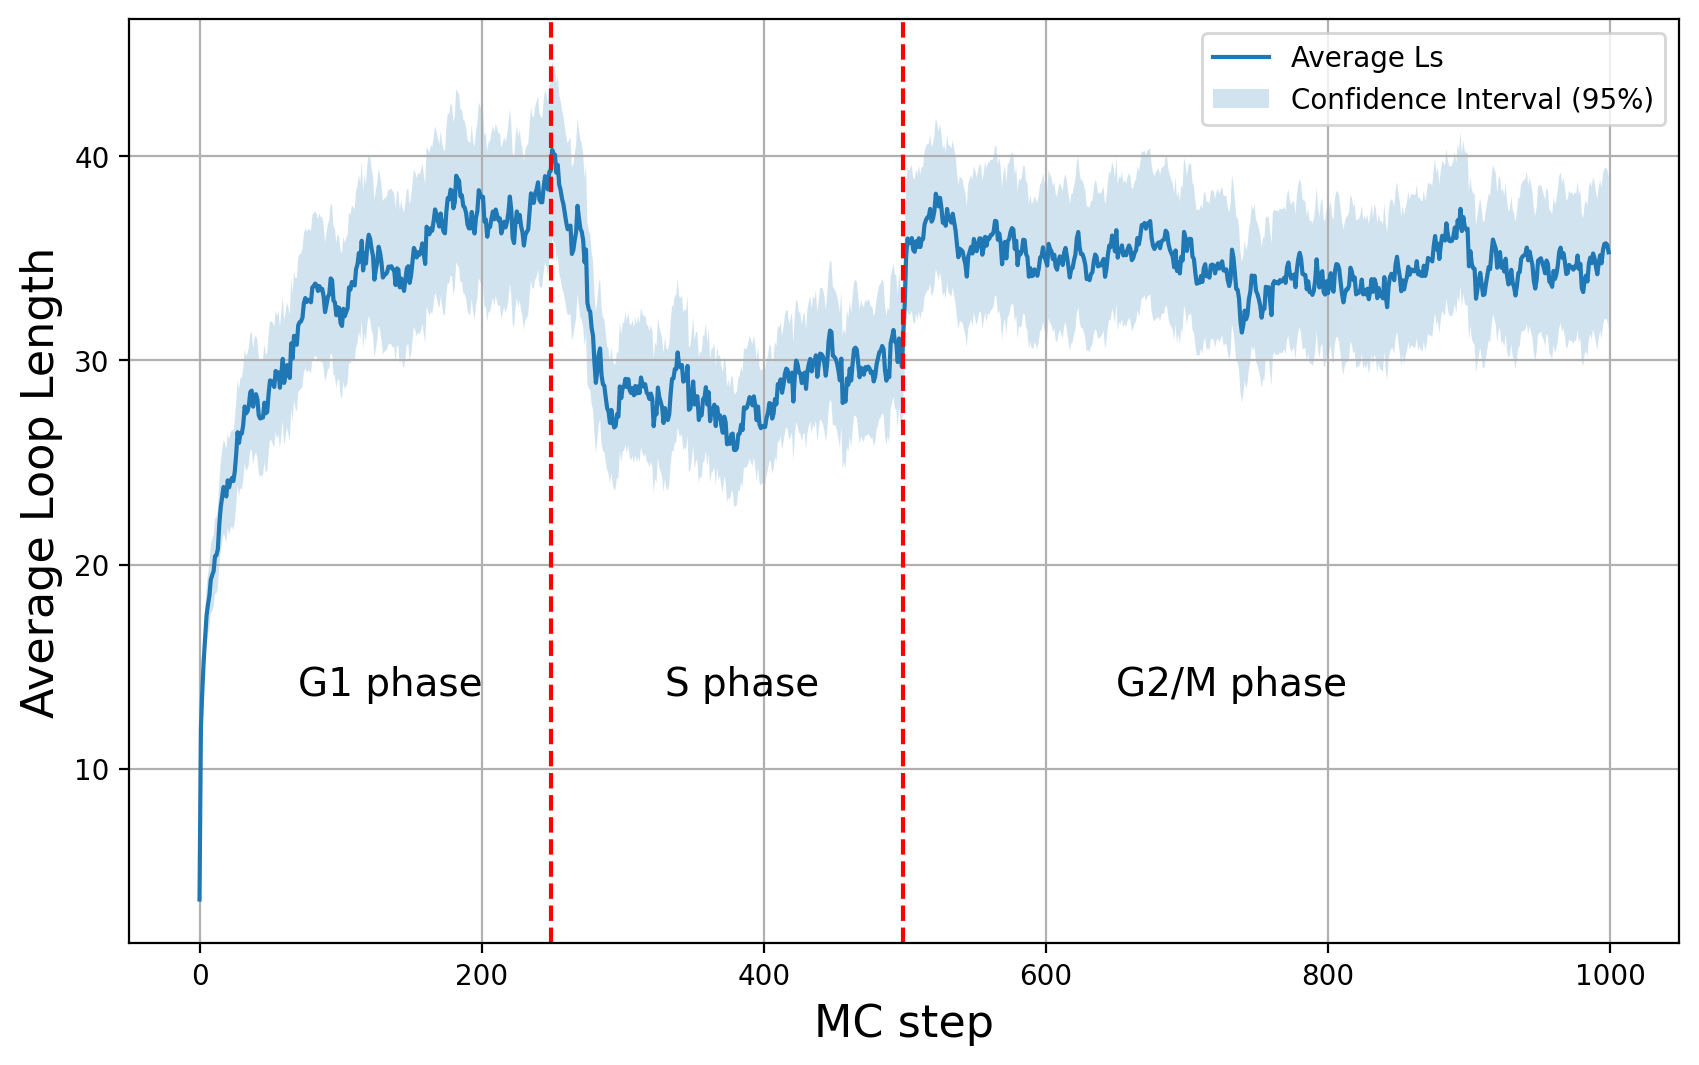

In [6]:
# Plot
plt.figure(figsize=(10, 6),dpi=200)
x = np.arange(len(avg_Ls))
plt.plot(x, avg_Ls, label='Average Ls')
plt.fill_between(x, avg_Ls - ci95, avg_Ls + ci95, alpha=0.2, label='Confidence Interval (95%)')
plt.xlabel('MC step',fontsize=16)
plt.ylabel('Average Loop Length',fontsize=16)
plt.legend()

# Vertical line at x = 123
plt.axvline(x=249, color='red', linestyle='--', label='x = 123')

# Annotate G1 phase
plt.annotate('G1 phase', 
             xy=(70, np.min(avg_Ls)),  # Position of the annotation (centered)
             xytext=(70, np.min(avg_Ls) + 10),  # Text position
             fontsize=14)

# Vertical line at x = 123
plt.axvline(x=499, color='red', linestyle='--', label='x = 123')

# Annotate G1 phase
plt.annotate('S phase', 
             xy=(330, np.min(avg_Ls)),  # Position of the annotation (centered)
             xytext=(330, np.min(avg_Ls) + 10),  # Text position
             fontsize=14)

# Annotate G1 phase
plt.annotate('G2/M phase', 
             xy=(650, np.min(avg_Ls)),  # Position of the annotation (centered)
             xytext=(650, np.min(avg_Ls) + 10),  # Text position
             fontsize=14)

# plt.title('Average Ls with 95% Confidence Interval',fontsize=16)

plt.grid(True)
plt.show()

In [7]:
Cs = np.load('/home/skorsak/Downloads/replisage/new_results/replisage_chromosome_14_ht_fast_lefs/metadata/spins.npy')

In [8]:
def compute_state_proportions(Ms, Ns, Cs):
    """
    Computes the proportion of links where connected nodes are:
    - in the same state
    - in different states
    as a function of time.

    Args:
        Ms: (array) Source node indices [i, t]
        Ns: (array) Target node indices [i, t]
        Cs: (array) Node states [n, t]
    
    Returns:
        same_state_fraction: array of proportion of same-state links at each time
        diff_state_fraction: array of proportion of different-state links at each time
    """
    num_times = Ms.shape[1]
    same_state_fraction = np.zeros(num_times)
    diff_state_fraction = np.zeros(num_times)

    for t in range(num_times):
        m_nodes = Ms[:, t]
        n_nodes = Ns[:, t]
        
        # Mask valid connections (both indices non-negative)
        valid = (m_nodes >= 0) & (n_nodes >= 0)

        if np.sum(valid) == 0:
            continue  # avoid division by zero
        
        m_states = Cs[m_nodes[valid], t]
        n_states = Cs[n_nodes[valid], t]
        
        same_state = m_states == n_states
        diff_state = m_states != n_states
        
        same_state_fraction[t] = np.sum(same_state) / np.sum(valid)
        diff_state_fraction[t] = np.sum(diff_state) / np.sum(valid)

    return same_state_fraction, diff_state_fraction

def compute_state_proportions_sign_based(Ms, Ns, Cs):
    """
    Computes the proportion of links where connected nodes are:
    - in the same sign state (both positive or both negative)
    - in different sign states
    as a function of time.

    Args:
        Ms: (array) Source node indices [i, t]
        Ns: (array) Target node indices [i, t]
        Cs: (array) Node states [n, t]
    
    Returns:
        same_sign_fraction: array of proportion of same-sign links at each time
        diff_sign_fraction: array of proportion of different-sign links at each time
    """
    num_times = Ms.shape[1]
    same_sign_fraction = np.zeros(num_times)
    diff_sign_fraction = np.zeros(num_times)

    for t in range(num_times):
        m_nodes = Ms[:, t]
        n_nodes = Ns[:, t]
        
        valid = (m_nodes >= 0) & (n_nodes >= 0)

        if np.sum(valid) == 0:
            continue
        
        m_states = Cs[m_nodes[valid], t]
        n_states = Cs[n_nodes[valid], t]
        
        # Check if one is positive and the other negative
        different_sign = (m_states > 0) & (n_states < 0) | (m_states < 0) & (n_states > 0)
        
        same_sign = ~different_sign  # complement
        
        same_sign_fraction[t] = np.sum(same_sign) / np.sum(valid)
        diff_sign_fraction[t] = np.sum(different_sign) / np.sum(valid)

    return same_sign_fraction, diff_sign_fraction

In [9]:
same_state_frac, diff_state_frac = compute_state_proportions_sign_based(Ms, Ns, Cs)

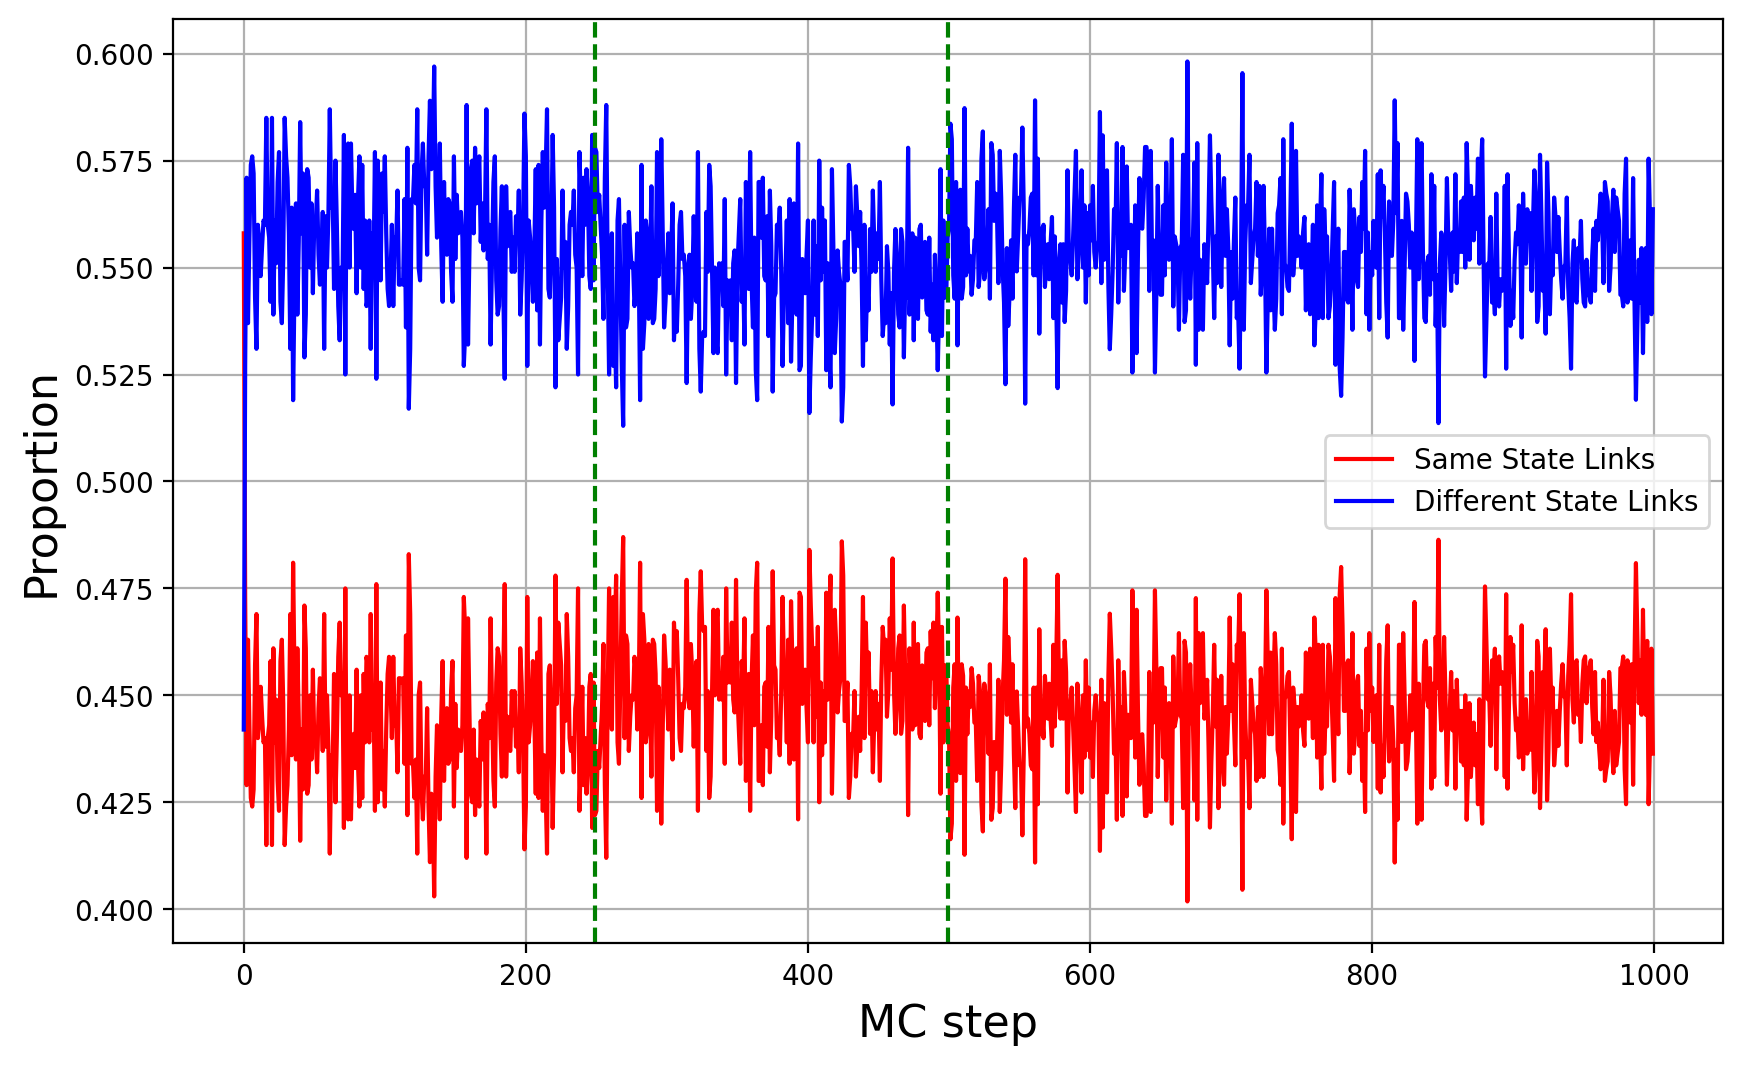

In [10]:
plt.figure(figsize=(10, 6),dpi=200)
times = np.arange(len(same_state_frac))

plt.plot(times, same_state_frac, label='Same State Links',color='red')
plt.plot(times, diff_state_frac, label='Different State Links',color='blue')
plt.xlabel('MC step',fontsize=16)
plt.ylabel('Proportion',fontsize=16)
plt.legend()

# Vertical line at x = 123
plt.axvline(x=249, color='green', linestyle='--', label='x = 123')

# Annotate G1 phase
plt.annotate('G1 phase', 
             xy=(70, np.min(avg_Ls)),  # Position of the annotation (centered)
             xytext=(70, np.min(avg_Ls) + 10),  # Text position
             fontsize=14)

# Vertical line at x = 123
plt.axvline(x=499, color='green', linestyle='--', label='x = 123')

# Annotate G1 phase
plt.annotate('S phase', 
             xy=(330, np.min(avg_Ls)),  # Position of the annotation (centered)
             xytext=(330, np.min(avg_Ls) + 10),  # Text position
             fontsize=14)

# Annotate G1 phase
plt.annotate('G2/M phase', 
             xy=(650, np.min(avg_Ls)),  # Position of the annotation (centered)
             xytext=(650, np.min(avg_Ls) + 10),  # Text position
             fontsize=14)

# plt.ylim((0,1))
# plt.title('Proportion of Same-State and Different-State Links Over Time')

plt.grid(True)
plt.show()

In [11]:
def compute_state_assortativity_over_time(Ms, Ns, Cs):
    T = Cs.shape[1]
    N = Cs.shape[0]
    assort_time_series = []

    for t in tqdm(range(T)):
        ms_t = Ms[:, t]
        ns_t = Ns[:, t]
        cs_t = Cs[:, t]

        ms_t, ns_t = ms_t[ms_t >= 0], ns_t[ns_t >= 0]
        dynamic_edges = list(zip(ms_t, ns_t))
        backbone_edges = [(i, i + 1) for i in range(N - 1)]

        G = nx.Graph()
        G.add_edges_from(backbone_edges + dynamic_edges)

        for i, state in enumerate(cs_t):
            G.nodes[i]['state'] = state

        assort = nx.attribute_assortativity_coefficient(G, 'state')
        assort_time_series.append(assort)

    return np.array(assort_time_series)

def compute_state_transition_matrix_over_time(Ms, Ns, Cs):
    T = Cs.shape[1]
    N = Cs.shape[0]
    state_set = np.unique(Cs)
    state_list = sorted(state_set)
    state_index = {s: i for i, s in enumerate(state_list)}
    S = len(state_list)

    transitions_over_time = []

    for t in tqdm(range(T)):
        ms_t = Ms[:, t]
        ns_t = Ns[:, t]
        cs_t = Cs[:, t]

        ms_t, ns_t = ms_t[ms_t >= 0], ns_t[ns_t >= 0]
        dynamic_edges = list(zip(ms_t, ns_t))
        backbone_edges = [(i, i + 1) for i in range(N - 1)]
        edges = dynamic_edges + backbone_edges

        M = np.zeros((S, S), dtype=int)
        for u, v in edges:
            i, j = state_index[cs_t[u]], state_index[cs_t[v]]
            M[i, j] += 1
            if i != j:
                M[j, i] += 1  # undirected

        M = M / M.sum() if M.sum() > 0 else M
        transitions_over_time.append(M)

    return np.array(transitions_over_time), state_list

def compute_edge_density_over_time(Ms, Ns, Cs):
    T = Cs.shape[1]
    N = Cs.shape[0]
    state_set = np.unique(Cs)
    state_list = sorted(state_set)
    state_index = {s: i for i, s in enumerate(state_list)}
    S = len(state_list)

    densities = []

    for t in tqdm(range(T)):
        ms_t = Ms[:, t]
        ns_t = Ns[:, t]
        cs_t = Cs[:, t]

        ms_t, ns_t = ms_t[ms_t >= 0], ns_t[ns_t >= 0]
        dynamic_edges = list(zip(ms_t, ns_t))
        backbone_edges = [(i, i + 1) for i in range(N - 1)]
        edges = dynamic_edges + backbone_edges

        counts = Counter(cs_t)
        max_links = np.zeros((S, S), dtype=int)
        observed_links = np.zeros((S, S), dtype=int)
        
        for u, v in edges:
            i, j = state_index[cs_t[u]], state_index[cs_t[v]]
            observed_links[i, j] += 1
            if i != j:
                observed_links[j, i] += 1

        for (i, si), (j, sj) in product(enumerate(state_list), repeat=2):
            if i == j:
                max_links[i, j] = counts[si] * (counts[si] - 1) // 2
            else:
                max_links[i, j] = counts[si] * counts[sj]

        with np.errstate(divide='ignore', invalid='ignore'):
            density = np.nan_to_num(observed_links / max_links)

        densities.append(density)

    return np.array(densities), state_list

In [12]:
assorts = compute_state_assortativity_over_time(Ms, Ns, Cs)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:05<00:00, 15.37it/s]


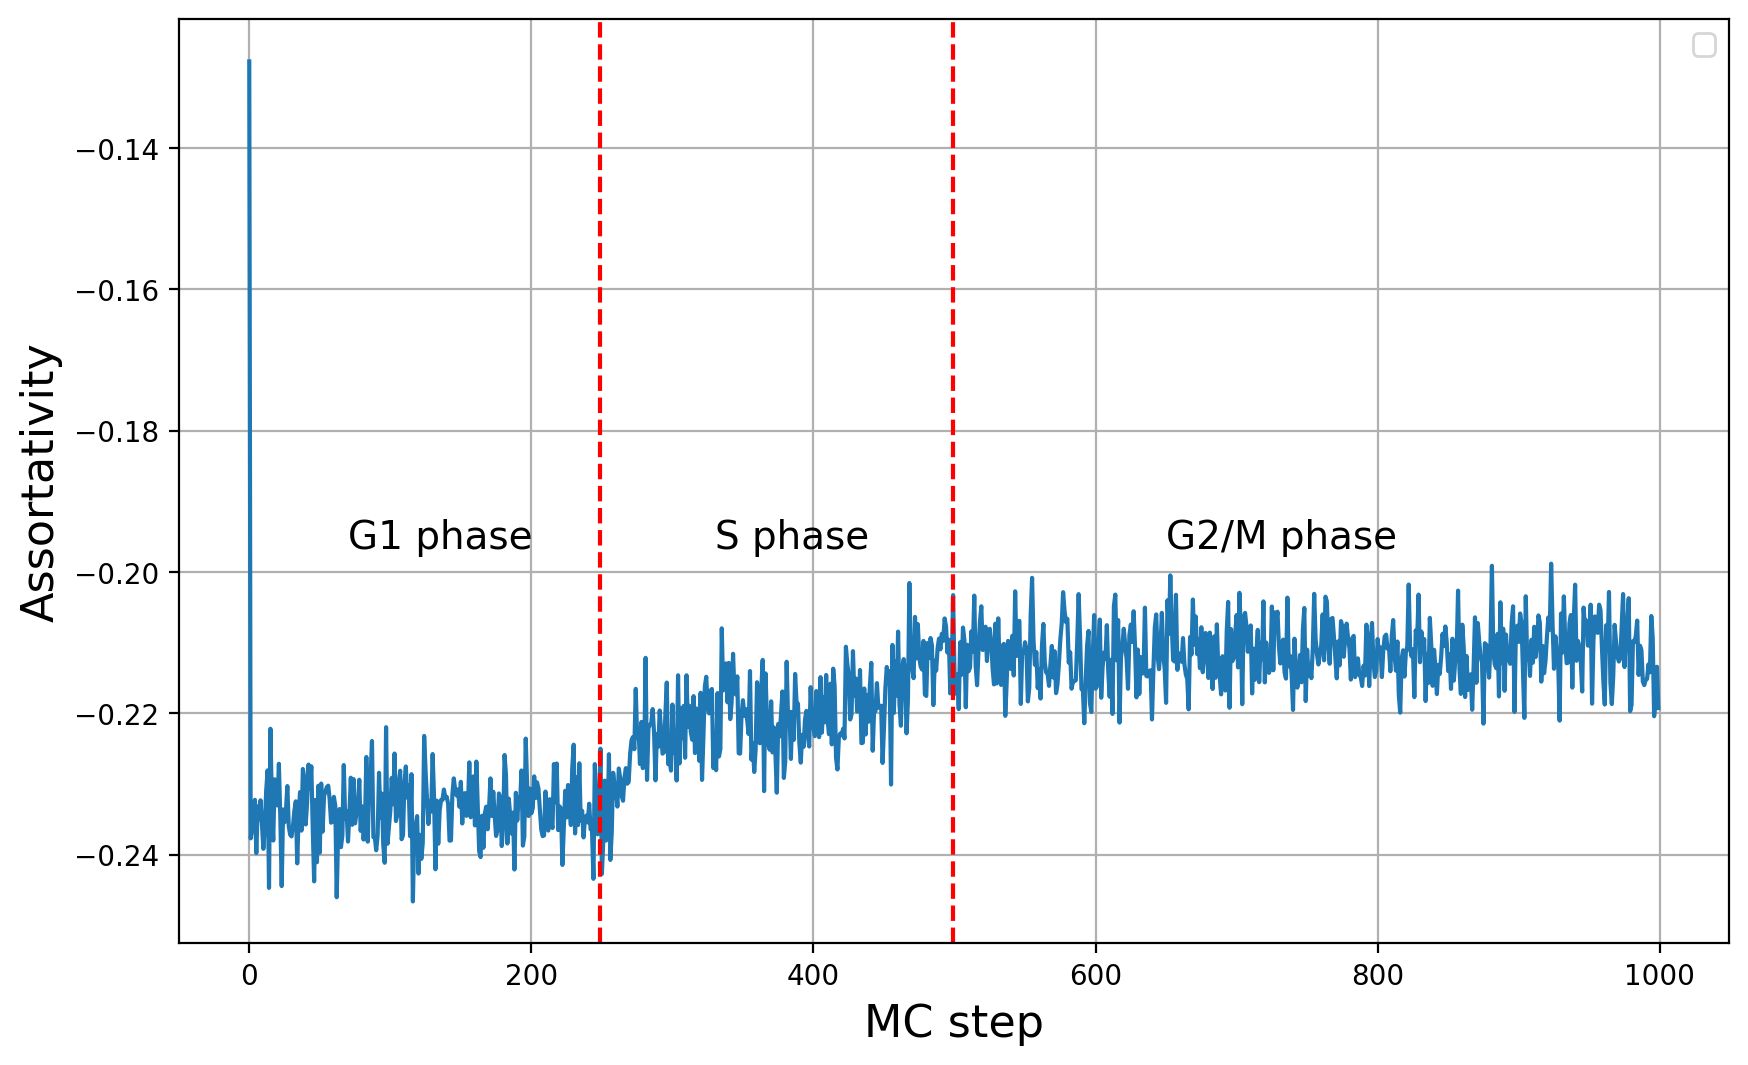

In [13]:
plt.figure(figsize=(10, 6),dpi=200)

plt.plot(assorts)

plt.xlabel('MC step',fontsize=16)
plt.ylabel('Assortativity',fontsize=16)
plt.legend()
# Vertical line at x = 123
plt.axvline(x=249, color='red', linestyle='--', label='x = 123')

# Annotate G1 phase
plt.annotate('G1 phase', 
             xy=(70, np.min(assorts)),  # Position of the annotation (centered)
             xytext=(70, np.min(assorts) + 0.05),  # Text position
             fontsize=14)

# Vertical line at x = 123
plt.axvline(x=499, color='red', linestyle='--', label='x = 123')

# Annotate G1 phase
plt.annotate('S phase', 
             xy=(330, np.min(assorts)),  # Position of the annotation (centered)
             xytext=(330, np.min(assorts) + 0.05),  # Text position
             fontsize=14)

# Annotate G1 phase
plt.annotate('G2/M phase', 
             xy=(650, np.min(assorts)),  # Position of the annotation (centered)
             xytext=(650, np.min(assorts) + 0.05),  # Text position
             fontsize=14)

# plt.title('Average Ls with 95% Confidence Interval',fontsize=16)

plt.grid(True)
plt.show()

In [14]:
densities, state_list = compute_edge_density_over_time(Ms, Ns, Cs)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 62.43it/s]


In [15]:
state_list

[-2, -1, 0, 1, 2]

In [16]:
densities.shape

(1000, 5, 5)

In [17]:
# Define slices for phases
g1_range = slice(0, 249)
s_range = slice(249, 499)
g2m_range = slice(499, 1000)

# Compute means and stds
mean_g1 = densities[g1_range].mean(axis=0)
std_g1  = densities[g1_range].std(axis=0)

mean_s = densities[s_range].mean(axis=0)
std_s  = densities[s_range].std(axis=0)

mean_g2m = densities[g2m_range].mean(axis=0)
std_g2m  = densities[g2m_range].std(axis=0)

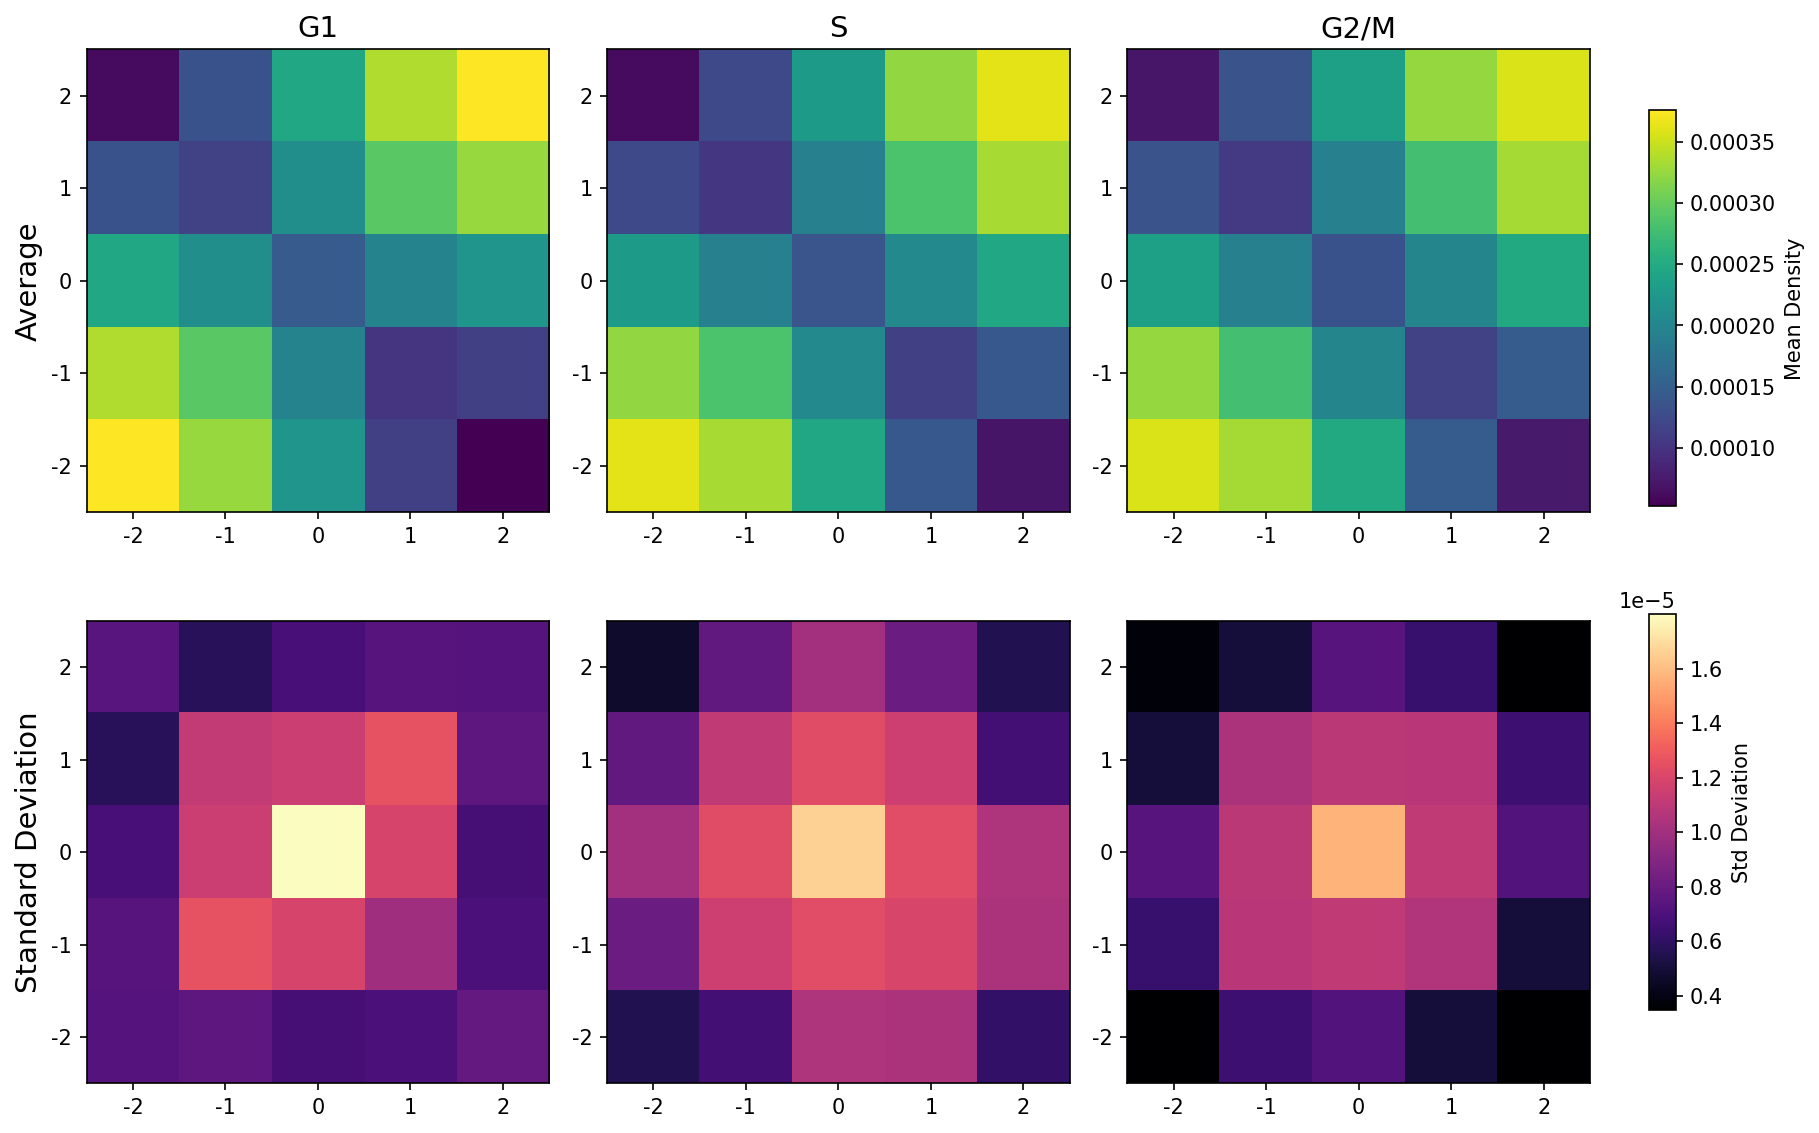

In [18]:
# Stack arrays for global color scale
avg_stack = np.stack([mean_g1, mean_s, mean_g2m])
std_stack = np.stack([std_g1, std_s, std_g2m])

vmin_avg, vmax_avg = avg_stack.min(), avg_stack.max()
vmin_std, vmax_std = std_stack.min(), std_stack.max()

fig, axs = plt.subplots(2, 3, figsize=(12, 8), dpi=150)

# Titles and data
col_titles = ['G1', 'S', 'G2/M']
row_titles = ['Average', 'Standard Deviation']
means = [mean_g1, mean_s, mean_g2m]
stds = [std_g1, std_s, std_g2m]

# Plot averages
for i in range(3):
    im = axs[0, i].imshow(means[i], cmap='viridis', vmin=vmin_avg, vmax=vmax_avg)
    axs[0, i].set_title(col_titles[i], fontsize=14)

# Plot standard deviations
for i in range(3):
    im2 = axs[1, i].imshow(stds[i], cmap='magma', vmin=vmin_std, vmax=vmax_std)

# Add row labels on the left
for i, ax in enumerate(axs[:, 0]):
    ax.set_ylabel(row_titles[i], fontsize=14)

# Apply tick labels from state_list, with y flipped
for ax_row in axs:
    for ax in ax_row:
        ax.set_xticks(range(len(state_list)))
        ax.set_yticks(range(len(state_list)))
        ax.set_xticklabels(state_list, fontsize=10)
        ax.set_yticklabels(state_list[::-1], fontsize=10)  # Flip y-axis labels

# Add shared colorbars
cbar_ax1 = fig.add_axes([0.92, 0.55, 0.015, 0.33])
cbar_ax2 = fig.add_axes([0.92, 0.13, 0.015, 0.33])
fig.colorbar(im, cax=cbar_ax1, label='Mean Density')
fig.colorbar(im2, cax=cbar_ax2, label='Std Deviation')

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

In [19]:
Rgs = np.load('/home/skorsak/Downloads/replisage/new_results/replisage_chromosome_14_ht_fast_lefs/metadata/Rgs.npy')

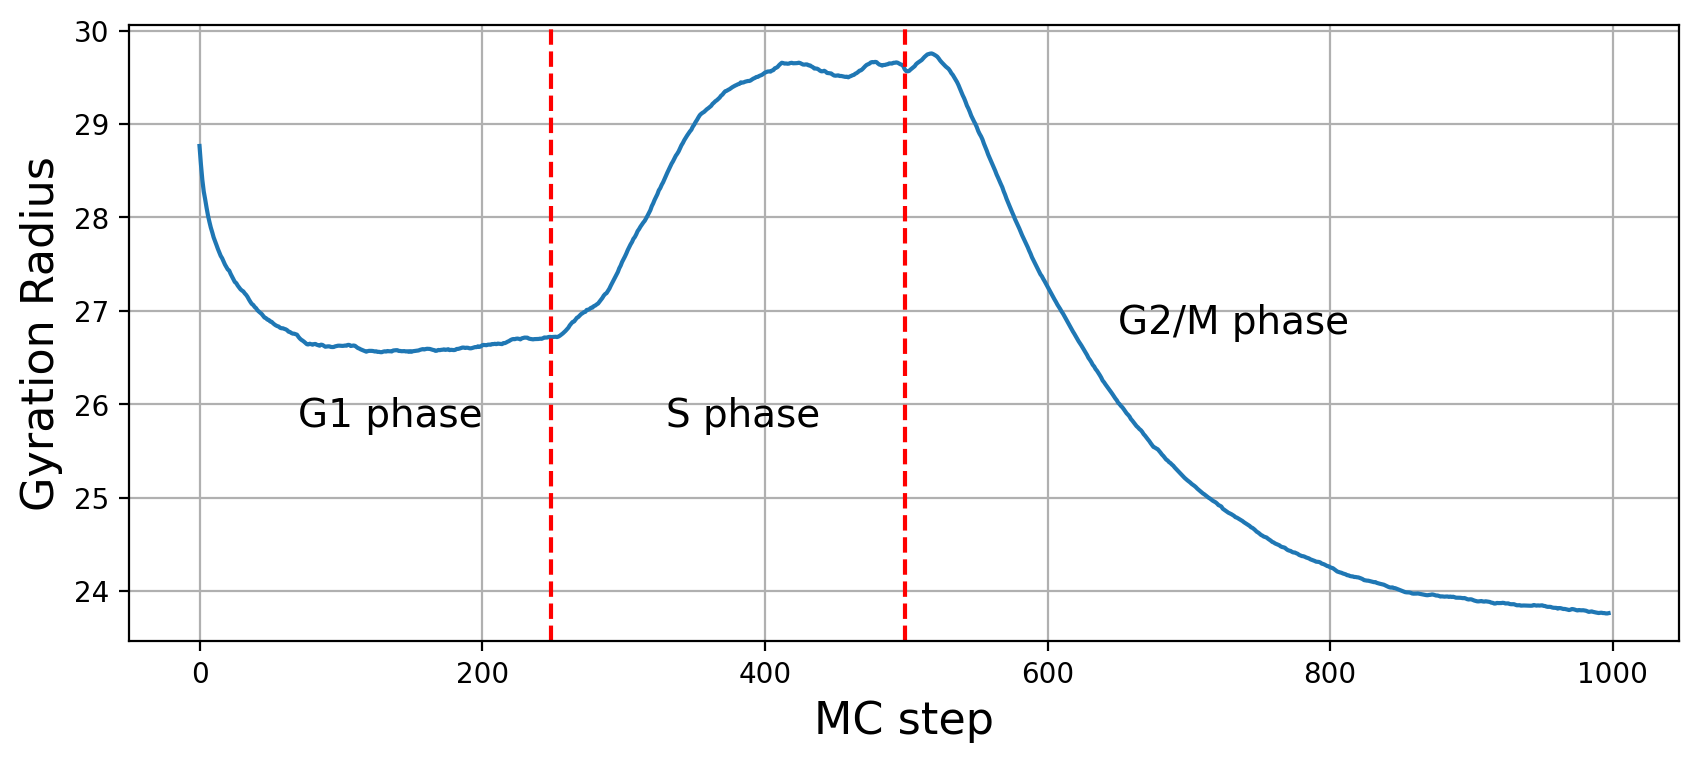

In [20]:
plt.figure(figsize=(10, 4),dpi=200)
x = np.arange(len(Rgs))
plt.plot(x, Rgs, label='Average Ls')
# plt.fill_between(x, avg_Ls - ci95, avg_Ls + ci95, alpha=0.2, label='Confidence Interval (95%)')
plt.xlabel('MC step',fontsize=16)
plt.ylabel('Gyration Radius',fontsize=16)
# plt.legend()
# Vertical line at x = 123
plt.axvline(x=249, color='red', linestyle='--', label='x = 123')

# Annotate G1 phase
plt.annotate('G1 phase', 
             xy=(70, np.min(Rgs)),  # Position of the annotation (centered)
             xytext=(70, np.min(Rgs) + 2),  # Text position
             fontsize=14)

# Vertical line at x = 123
plt.axvline(x=499, color='red', linestyle='--', label='x = 123')

# Annotate G1 phase
plt.annotate('S phase', 
             xy=(330, np.min(Rgs)),  # Position of the annotation (centered)
             xytext=(330, np.min(Rgs) + 2),  # Text position
             fontsize=14)

# Annotate G1 phase
plt.annotate('G2/M phase', 
             xy=(650, np.min(Rgs)),  # Position of the annotation (centered)
             xytext=(650, np.min(Rgs) + 3),  # Text position
             fontsize=14)


plt.grid(True)
plt.show()

In [21]:
eeds = np.load('/home/skorsak/Downloads/replisage/new_results/replisage_chromosome_14_ht_fast_lefs/metadata/eeds.npy')

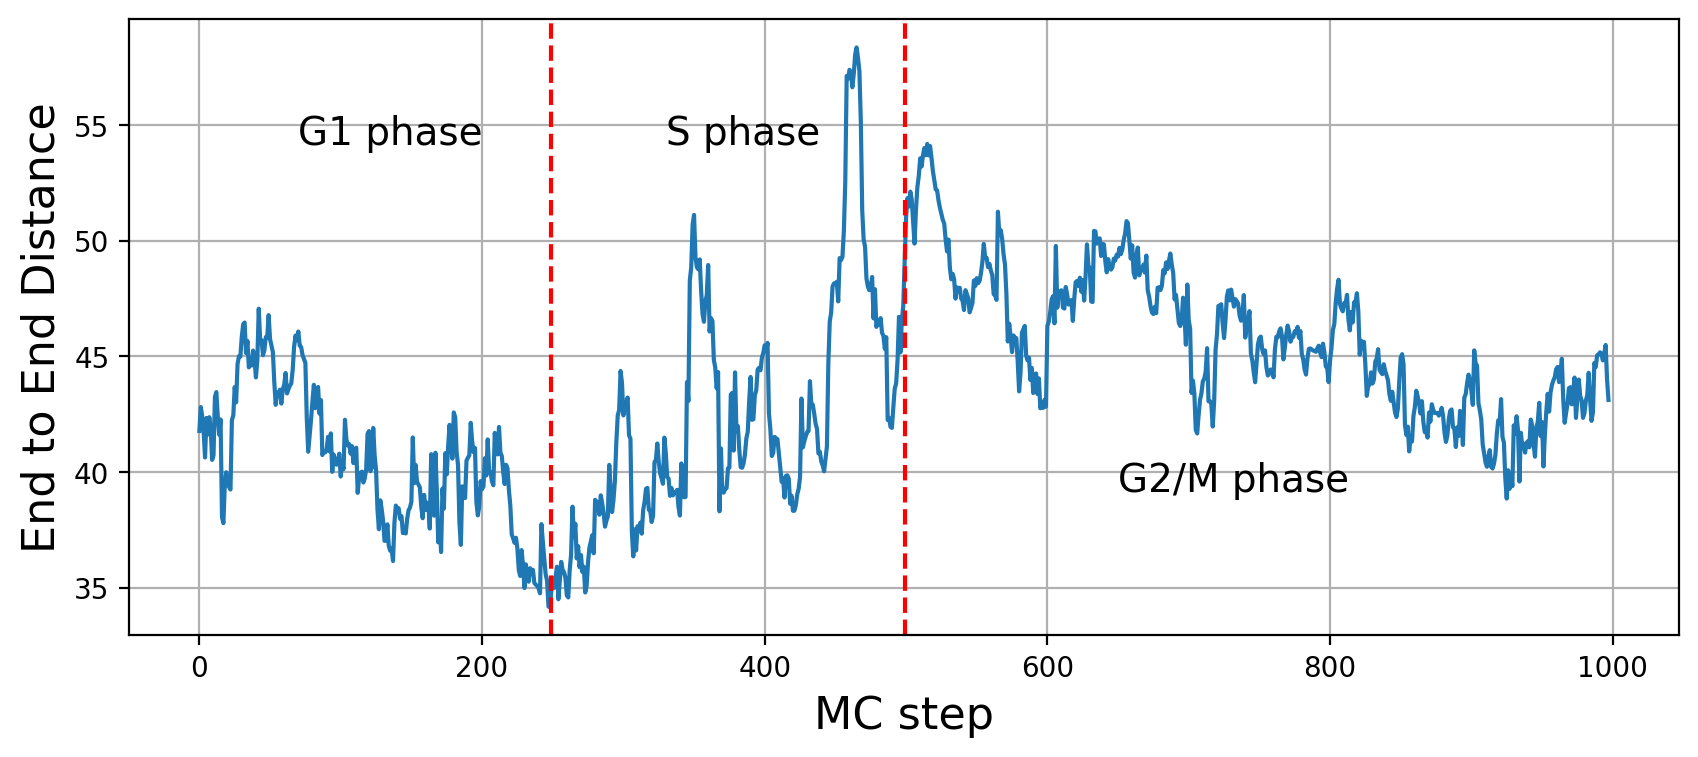

In [22]:
plt.figure(figsize=(10, 4),dpi=200)
x = np.arange(len(Rgs))
plt.plot(x, eeds, label='Average Ls')
# plt.fill_between(x, avg_Ls - ci95, avg_Ls + ci95, alpha=0.2, label='Confidence Interval (95%)')
plt.xlabel('MC step',fontsize=16)
plt.ylabel('End to End Distance',fontsize=16)
# plt.legend()
# Vertical line at x = 123
plt.axvline(x=249, color='red', linestyle='--', label='x = 123')

# Annotate G1 phase
plt.annotate('G1 phase', 
             xy=(70, np.min(eeds)),  # Position of the annotation (centered)
             xytext=(70, np.min(eeds) + 20),  # Text position
             fontsize=14)

# Vertical line at x = 123
plt.axvline(x=499, color='red', linestyle='--', label='x = 123')

# Annotate G1 phase
plt.annotate('S phase', 
             xy=(330, np.min(eeds)),  # Position of the annotation (centered)
             xytext=(330, np.min(eeds) + 20),  # Text position
             fontsize=14)

# Annotate G1 phase
plt.annotate('G2/M phase', 
             xy=(650, np.min(eeds)),  # Position of the annotation (centered)
             xytext=(650, np.min(eeds) + 5),  # Text position
             fontsize=14)


plt.grid(True)
plt.show()

In [23]:
cov_vols = np.load('/home/skorsak/Downloads/replisage/new_results/replisage_chromosome_14_ht_fast_lefs/metadata/convex_hull_volume.npy')

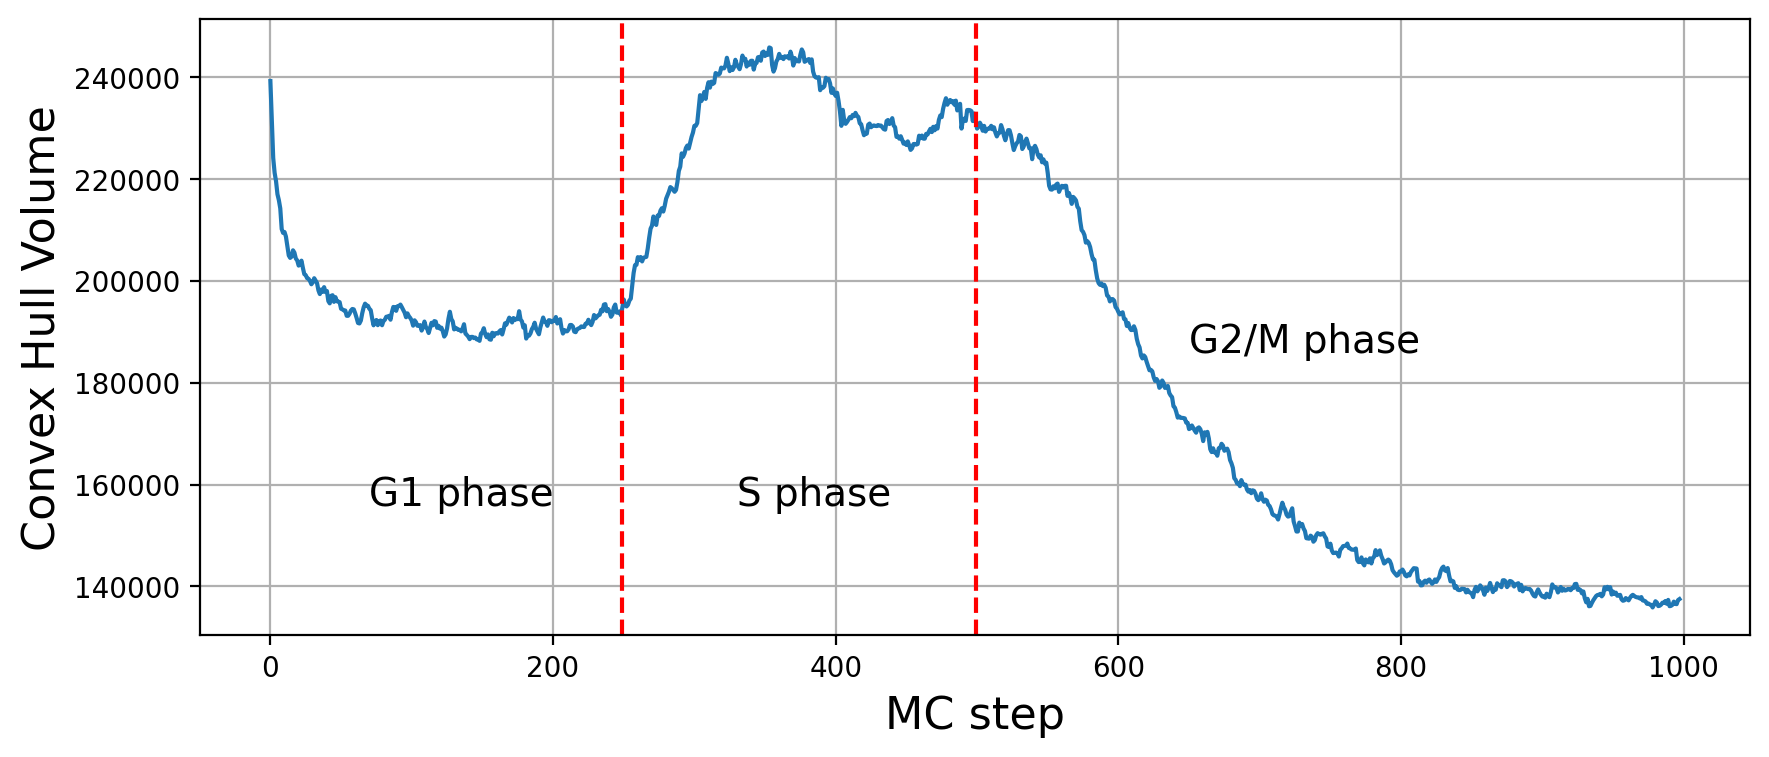

In [24]:
plt.figure(figsize=(10, 4),dpi=200)
x = np.arange(len(Rgs))
plt.plot(x, cov_vols, label='Average Ls')
# plt.fill_between(x, eeds - ci95, eeds + ci95, alpha=0.2, label='Confidence Interval (95%)')
plt.xlabel('MC step',fontsize=16)
plt.ylabel('Convex Hull Volume',fontsize=16)
# plt.legend()
# Vertical line at x = 123
plt.axvline(x=249, color='red', linestyle='--', label='x = 123')

# Annotate G1 phase
plt.annotate('G1 phase', 
             xy=(70, np.min(cov_vols)),  # Position of the annotation (centered)
             xytext=(70, np.min(cov_vols) + 20000),  # Text position
             fontsize=14)

# Vertical line at x = 123
plt.axvline(x=499, color='red', linestyle='--', label='x = 123')

# Annotate G1 phase
plt.annotate('S phase', 
             xy=(330, np.min(cov_vols)),  # Position of the annotation (centered)
             xytext=(330, np.min(cov_vols) + 20000),  # Text position
             fontsize=14)

# Annotate G1 phase
plt.annotate('G2/M phase', 
             xy=(650, np.min(cov_vols)),  # Position of the annotation (centered)
             xytext=(650, np.min(cov_vols) + 50000),  # Text position
             fontsize=14)


plt.grid(True)
plt.show()

In [25]:
Es = np.load('/home/skorsak/Downloads/replisage/new_results/replisage_chromosome_14_ht_fast_lefs/metadata/Es.npy')
Es_potts = np.load('/home/skorsak/Downloads/replisage/new_results/replisage_chromosome_14_ht_fast_lefs/metadata/Es_potts.npy')
Fs = np.load('/home/skorsak/Downloads/replisage/new_results/replisage_chromosome_14_ht_fast_lefs/metadata/Fs.npy')
Bs = np.load('/home/skorsak/Downloads/replisage/new_results/replisage_chromosome_14_ht_fast_lefs/metadata/Bs.npy')
Rs = np.load('/home/skorsak/Downloads/replisage/new_results/replisage_chromosome_14_ht_fast_lefs/metadata/Rs.npy')

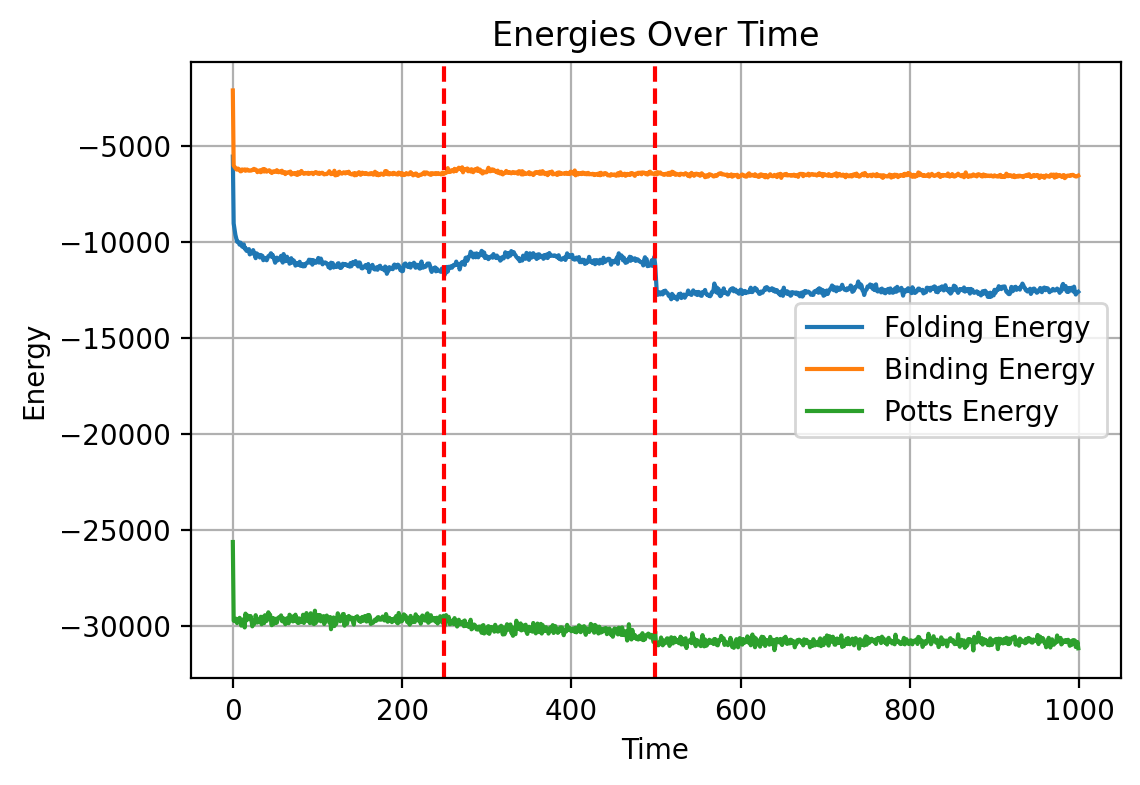

In [26]:
plt.figure(figsize=(6, 4),dpi=200)

# plt.plot(times, Es, label='Total Energy')
plt.plot(times, Fs, label='Folding Energy')
plt.plot(times, Bs, label='Binding Energy')
plt.plot(times, Es_potts, label='Potts Energy')
# plt.plot(times, Rs, label='Replication Energy')
plt.legend()

# Vertical line at x = 123
plt.axvline(x=249, color='red', linestyle='--', label='x = 123')
# Vertical line at x = 123
plt.axvline(x=499, color='red', linestyle='--', label='x = 123')

plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energies Over Time')

# plt.yscale('symlog')
plt.grid(True)
plt.show()

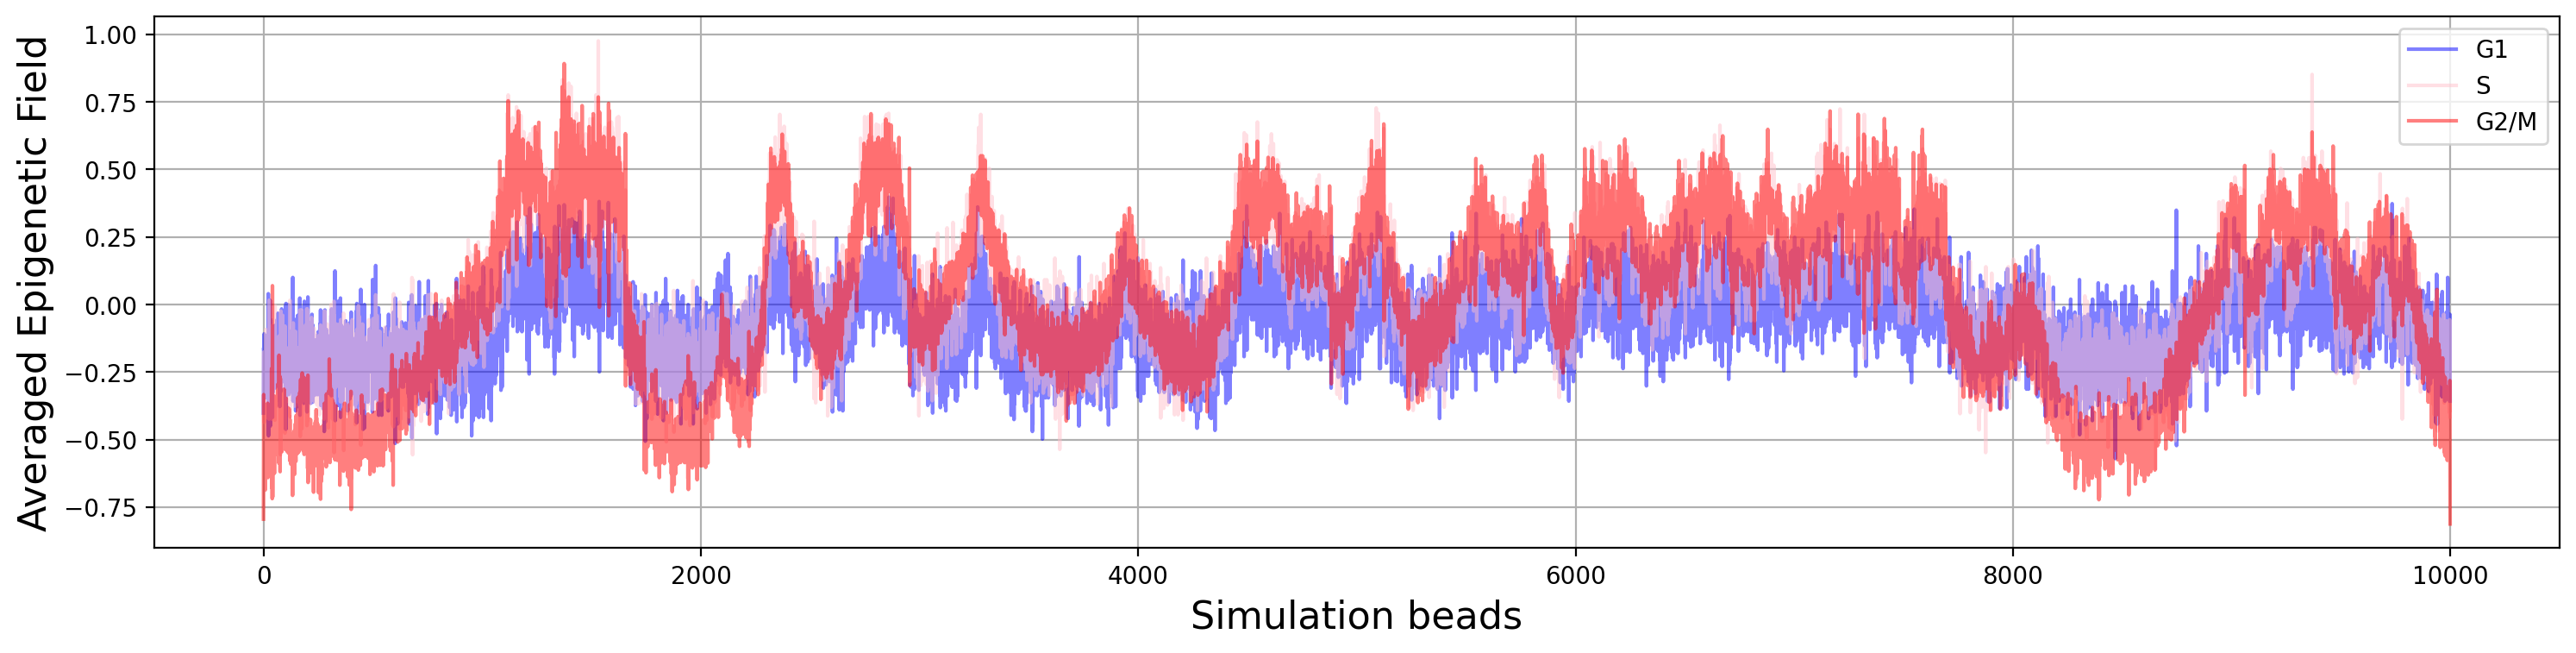

In [27]:
plt.figure(figsize=(18, 4),dpi=200)
plt.plot(np.average(Cs[:,:249],axis=1),label='G1',alpha=0.5,color='blue')
plt.plot(np.average(Cs[:,249:499],axis=1),label='S',alpha=0.5,color='pink')
plt.plot(np.average(Cs[:,499:],axis=1),label='G2/M',alpha=0.5,color='red')
plt.ylabel('Averaged Epigenetic Field',fontsize=16)
plt.xlabel('Simulation beads',fontsize=16)
plt.legend()
plt.grid()
plt.show()

In [28]:
import pyBigWig
import numpy as np

def load_signal_region(bigwig_path, chrom, start, end):
    bw = pyBigWig.open(bigwig_path)
    values = np.array(bw.values(chrom, start, end))
    bw.close()
    return np.nan_to_num(values)

def bin_average_signal(signal, target_size):
    N = len(signal)
    edges = np.linspace(0, N, target_size + 1, dtype=int)
    binned = np.zeros(target_size)
    
    for i in range(target_size):
        binned[i] = signal[edges[i]:edges[i+1]].mean()
    
    return binned

# === Parameters ===
bigwig_path = "/home/skorsak/Data/ENCODE/ENCSR968KAY/ENCFF412CDH_compartments.bigWig"
chrom = "chr14"
start = 10835000
end = 98674700
target_beads = 10000

# === Execution ===
signal = load_signal_region(bigwig_path, chrom, start, end)
comp_signal = bin_average_signal(signal, target_beads)

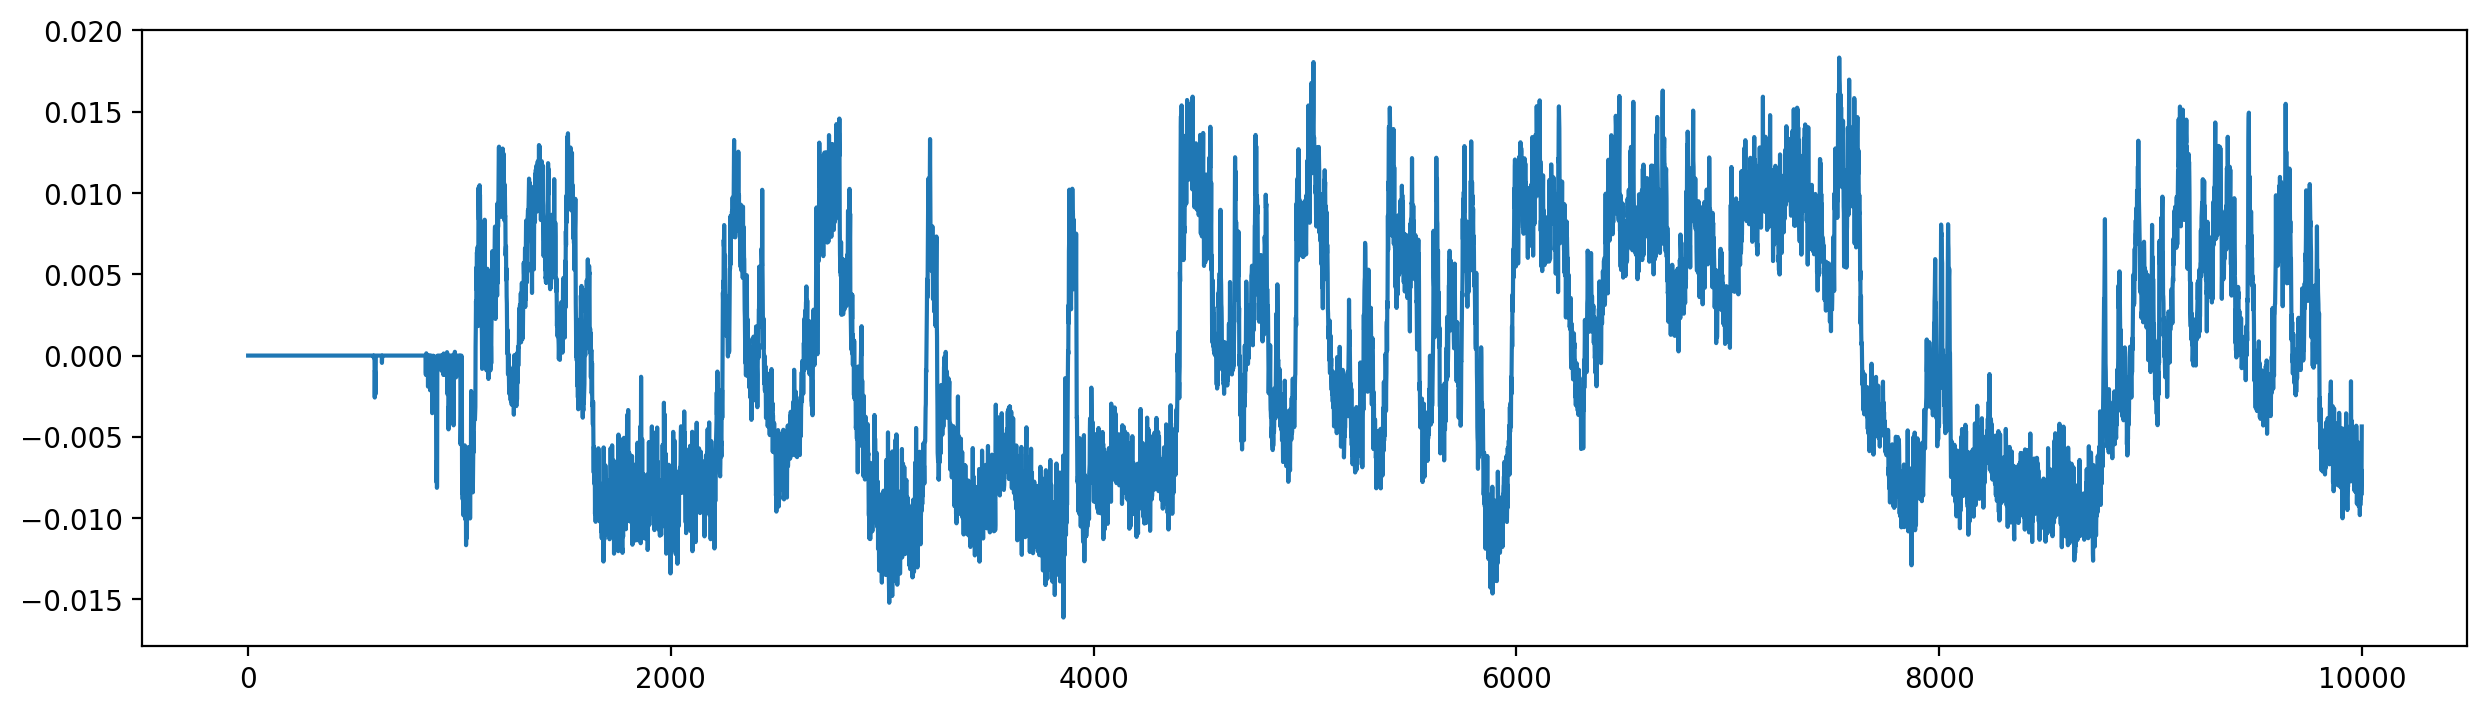

In [29]:
plt.figure(figsize=(15, 4),dpi=200)
plt.plot(comp_signal)

In [30]:
from scipy.stats import pearsonr, spearmanr

def compare_signals(sig1, sig2):
    assert len(sig1) == len(sig2), "Signals must be same length"
    pearson = pearsonr(sig1, sig2)[0]
    spearman = spearmanr(sig1, sig2)[0]
    return pearson, spearman

In [31]:
compare_signals(comp_signal, np.average(Cs[:,:249],axis=1))

(0.45429155199506344, 0.4654468457144364)

In [32]:
compare_signals(comp_signal, np.average(Cs[:,249:499],axis=1))

(0.5799910833629207, 0.5884045632758962)

In [33]:
compare_signals(comp_signal, np.average(Cs[:,499:],axis=1))

(0.5845114468447652, 0.6056969708255874)

In [34]:
H = np.load('/home/skorsak/Downloads/replisage/new_results/replisage_chromosome_14_ht_fast_lefs/metadata/heatmap_1_998.npy')
H_G1 = np.load('/home/skorsak/Downloads/replisage/new_results/replisage_chromosome_14_ht_fast_lefs/metadata/heatmap_1_248.npy')
H_S = np.load('/home/skorsak/Downloads/replisage/new_results/replisage_chromosome_14_ht_fast_lefs/metadata/heatmap_248_498.npy')
H_G2M = np.load('/home/skorsak/Downloads/replisage/new_results/replisage_chromosome_14_ht_fast_lefs/metadata/heatmap_498_998.npy')
H = np.nan_to_num(H, nan=0.0, posinf=0.0, neginf=0.0)
H_G1 = np.nan_to_num(H_G1, nan=0.0, posinf=0.0, neginf=0.0)
H_S = np.nan_to_num(H_S, nan=0.0, posinf=0.0, neginf=0.0)
H_G2M = np.nan_to_num(H_G2M, nan=0.0, posinf=0.0, neginf=0.0)

In [35]:
# Stack all heatmaps into a single array
all_data = np.concatenate([H.ravel(), H_G1.ravel(), H_S.ravel(), H_G2M.ravel()])

# Compute global mean and std
global_mean = np.mean(all_data)
global_std  = np.std(all_data)

# Compute bounds
Hmin = global_mean - global_std
Hmax = global_mean + global_std

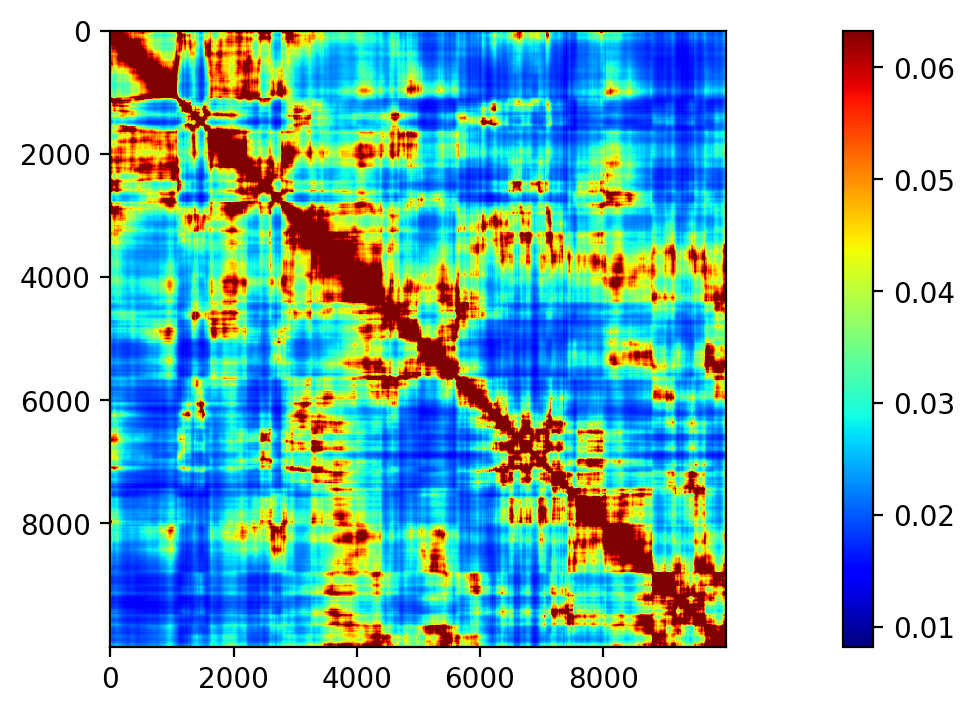

In [36]:
plt.figure(figsize=(15, 4),dpi=200)
plt.imshow(H,cmap='jet',vmax=Hmax, vmin=Hmin)
plt.colorbar()

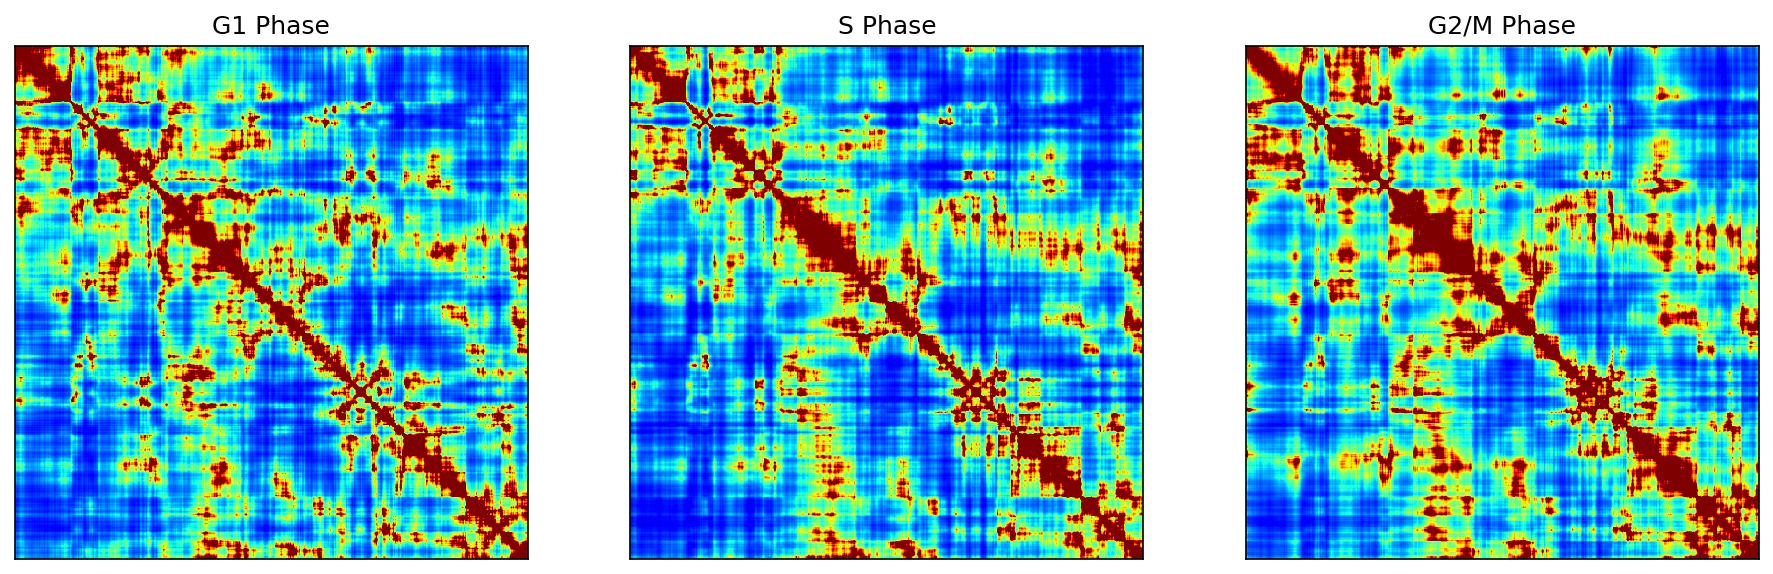

In [37]:
# Prepare plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5), dpi=150)

# Plot each heatmap
titles = ['G1 Phase', 'S Phase', 'G2/M Phase']
heatmaps = [H_G1, H_S, H_G2M]

for ax, heatmap, title in zip(axs, heatmaps, titles):
    im = ax.imshow(heatmap, cmap='jet', vmin=Hmin, vmax=Hmax)
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

In [38]:
import numpy as np
from joblib import Parallel, delayed
from tqdm import tqdm

# === Random walk generator (3D)
def generate_random_walk(N, seed=None):
    rng = np.random.default_rng(seed)
    steps = rng.normal(size=(N - 1, 3))
    steps /= np.linalg.norm(steps, axis=1)[:, None]
    coords = np.vstack(([0, 0, 0], np.cumsum(steps, axis=0)))
    return coords

# === Inverse distance heatmap
def compute_inverse_distance_matrix(coords):
    N = coords.shape[0]
    D = np.linalg.norm(coords[:, None, :] - coords[None, :, :], axis=2)
    with np.errstate(divide='ignore', invalid='ignore'):
        invD = 1.0 / D
        np.fill_diagonal(invD, 0.0)
    return invD.astype(np.float32)

# === Parallelized average over models
def compute_single_heatmap(seed, N):
    coords = generate_random_walk(N, seed)
    return compute_inverse_distance_matrix(coords)

def average_inverse_distance_heatmaps_parallel(N=1000, num_models=998, n_jobs=-1):
    results = Parallel(n_jobs=n_jobs)(
        delayed(compute_single_heatmap)(seed, N) for seed in tqdm(range(num_models))
    )
    return np.mean(results, axis=0, dtype=np.float32)

In [39]:
# Parameters
N = 1000         # Beads per polymer
num_models = 998 # Number of random walk instances

# Run
avg_random_heatmap = average_inverse_distance_heatmaps_parallel(N=N, num_models=num_models)

100%|████████████████████████████████████████████████████████████████████████████████████████████| 998/998 [00:13<00:00, 73.43it/s]


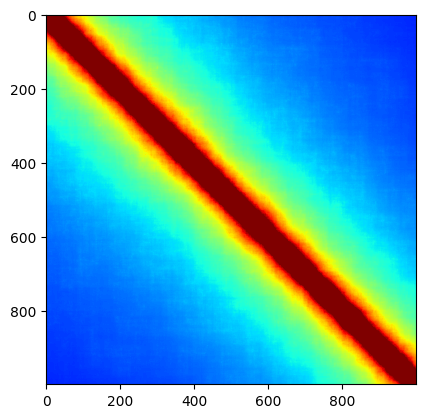

In [40]:
hmin = np.mean(avg_random_heatmap)-np.std(avg_random_heatmap)
hmax = np.mean(avg_random_heatmap)+np.std(avg_random_heatmap)
plt.imshow(avg_random_heatmap,cmap='jet',vmax=hmax, vmin=hmin)

In [41]:
def compute_experimental_heatmap(hic_file,chrom,region,resolution=100000,viz=False):
    '''
    Imports the path of a .hic file and exports the heatmap as a numpy array.
    '''
    hic = hc.HiCFile(hic_file)
    hic_mat_obj = hic.getMatrixZoomData(chrom, chrom, "observed", "KR", "BP", resolution)
    numpy_hic = hic_mat_obj.getRecordsAsMatrix(region[0], region[1], region[0], region[1])
    if viz:
        figure(figsize=(25, 20))
        plt.imshow(numpy_hic,cmap="Reds",vmax=np.average(numpy_hic)+3*np.std(numpy_hic))
        plt.colorbar()
    return numpy_hic

In [42]:
import hicstraw as hc

hic_file = '/home/skorsak/Data/4DNucleome/4DNFI9YAVTI1_HiC_GM12878/4DNFI9YAVTI1.hic'
hic_mat = compute_experimental_heatmap(hic_file,'14',[10835000,98674700])

In [43]:
hic_mat.shape
hicmax = np.mean(hic_mat)+np.std(hic_mat)
hicmin = np.mean(hic_mat)-np.std(hic_mat)

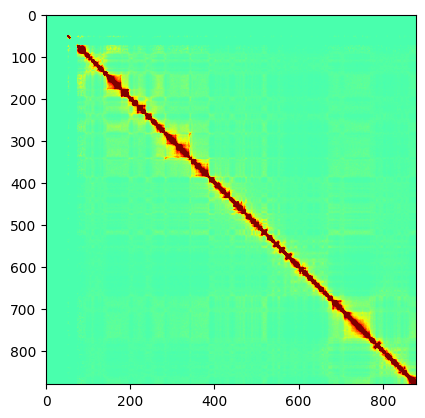

In [44]:
plt.imshow(hic_mat,vmax=hicmax,vmin=hicmin,cmap='jet')

In [45]:
from scipy.linalg import sqrtm

def compute_fid(X, Y):
    """
    X, Y: shape (n_samples, n_features) — flattened heatmaps
    """
    # Compute statistics
    mu_x, mu_y = X.mean(axis=0), Y.mean(axis=0)
    cov_x, cov_y = np.cov(X, rowvar=False), np.cov(Y, rowvar=False)

    # Mean difference
    diff = mu_x - mu_y
    mean_term = np.dot(diff, diff)

    # sqrt of product of covariances
    covmean = sqrtm(cov_x @ cov_y)
    if np.iscomplexobj(covmean):  # numerical fix
        covmean = covmean.real

    fid = mean_term + np.trace(cov_x + cov_y - 2 * covmean)
    return fid

In [46]:
def downscale_matrix_by_averaging(M, target_size):
    """
    Downscale a square matrix M to (target_size x target_size)
    by averaging over square windows (non-divisible sizes supported).
    """
    assert M.shape[0] == M.shape[1], "Input matrix must be square"
    N = M.shape[0]
    edges = np.linspace(0, N, target_size + 1, dtype=int)
    M_coarse = np.zeros((target_size, target_size), dtype=M.dtype)

    for i in range(target_size):
        for j in range(target_size):
            block = M[edges[i]:edges[i+1], edges[j]:edges[j+1]]
            M_coarse[i, j] = block.mean() if block.size > 0 else 0

    return M_coarse

def normalize_heatmap(H, method='zscore', log=False, eps=1e-10):
    """
    Normalize a heatmap.

    Parameters:
        H      : np.ndarray, square matrix
        method : 'zscore' or 'minmax'
        log    : apply log1p before normalization (default: False)
        eps    : small number to avoid division by zero

    Returns:
        H_norm : normalized heatmap
    """
    H = np.array(H, dtype=np.float64)

    if log:
        H = np.log1p(H)  # log(1 + x), safe for 0s

    if method == 'zscore':
        mean = H.mean()
        std = H.std() + eps
        H_norm = (H - mean) / std
    elif method == 'minmax':
        Hmin = H.min()
        Hmax = H.max()
        H_norm = (H - Hmin) / (Hmax - Hmin + eps)
    else:
        raise ValueError("Method must be 'zscore' or 'minmax'")

    return H_norm

In [47]:
h = downscale_matrix_by_averaging(H, len(hic_mat))
h = normalize_heatmap(h)
hic_mat = normalize_heatmap(hic_mat)

In [48]:
compute_fid(h, hic_mat)

543.9489518305177

In [49]:
h_rw = downscale_matrix_by_averaging(avg_random_heatmap, len(hic_mat))
h_rw = normalize_heatmap(h_rw)
compute_fid(h_rw, hic_mat)

638.4536764243503

In [50]:
h_g1 = downscale_matrix_by_averaging(H_G1, len(hic_mat))
h_g1 = normalize_heatmap(h_g1)
compute_fid(h_g1, hic_mat)

582.5398121686413

In [51]:
h_s = downscale_matrix_by_averaging(H_S, len(hic_mat))
h_s = normalize_heatmap(h_s)
compute_fid(h_s, hic_mat)

557.6801725455986

In [52]:
h_g2m = downscale_matrix_by_averaging(H_G2M, len(hic_mat))
h_g2m = normalize_heatmap(h_g2m)
compute_fid(h_g2m, hic_mat)

596.1432846168252

In [53]:
from skimage.metrics import structural_similarity as ssim

def compute_ssim(A, B):
    return ssim(A, B, data_range=B.max() - B.min())

In [54]:
compute_ssim(h, hic_mat)

0.8291273702963874

In [55]:
compute_ssim(h_rw, hic_mat)

0.8401482416732469

In [56]:
compute_ssim(h_g1, hic_mat)

0.8229086572827096

In [57]:
compute_ssim(h_s, hic_mat)

0.8351929589194965

In [58]:
compute_ssim(h_g2m, hic_mat)

0.8248579008220932

In [59]:
from scipy.stats import pearsonr, spearmanr

def compare_flat_correlation(A, B):
    A_flat, B_flat = A.ravel(), B.ravel()
    return pearsonr(A_flat, B_flat)[0], spearmanr(A_flat, B_flat)[0]

In [60]:
compare_flat_correlation(h, hic_mat)

(0.6808545543627805, 0.3316885280529234)

In [61]:
compare_flat_correlation(h_rw, hic_mat)

(0.36300004996564733, 0.5262002155441519)

In [62]:
compare_flat_correlation(h_g1, hic_mat)

(0.656672978733358, 0.27842606786285357)

In [63]:
compare_flat_correlation(h_s, hic_mat)

(0.6719346742890301, 0.3335050646794209)

In [64]:
compare_flat_correlation(h_g2m, hic_mat)

(0.649492204283773, 0.3270249603346841)